In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
columns=['times_preg','plasma_gluc','diastolic_bp','triceps_skin','2hourserum','BMI','diab_pedigree','age','diab_outcome']

In [13]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
               header=None,names=columns)

In [14]:
df.head()

,times_preg,plasma_gluc,diastolic_bp,triceps_skin,2hourserum,BMI,diab_pedigree,age,diab_outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.describe()

,times_preg,plasma_gluc,diastolic_bp,triceps_skin,2hourserum,BMI,diab_pedigree,age,diab_outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


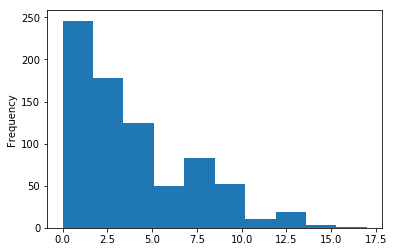

In [18]:
df.times_preg.plot(kind='hist')

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(df.ix[:,:-1],df[['diab_outcome']],test_size=0.25,random_state=0)

In [84]:
import numpy as np
def summarize(dataset):
    summaries = [(np.mean(attribute), np.std(attribute)) for attribute in zip(*dataset)]
    return summaries
# Note that since dataset is a list of input vectors we will be passing just he list as one argumnet to the zip function, *dataset
# helps us unpack the input vectors and pass them to the zip function so they can be zipped

In [88]:
summarize(np.array(X_train))

[(3.8402777777777777, 3.4225826717643693),
 (121.15625, 31.674339462440955),
 (69.684027777777771, 18.995453268825077),
 (21.126736111111111, 16.014628093032332),
 (84.184027777777771, 117.20917387019057),
 (32.208854166666669, 7.9535069182202314),
 (0.46854340277777773, 0.33210320129538551),
 (33.583333333333336, 11.992908784407188)]

In [125]:
Y_test.diab_outcome.unique()

array([1, 0])

In [127]:
x=(2,2,25)
print(stats.norm.pdf(*x))
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
print(calculateProbability(*x))

0.0159576912161
0.015957691216057307


In [128]:
from sklearn import naive_bayes

In [130]:
nvbayesestimator=naive_bayes.GaussianNB()

In [162]:
nvbayesestimator.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [164]:
nvbayesestimator.score(X_test,Y_test)

0.765625

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
logisestimator=LogisticRegression()

In [167]:
logisestimator.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
logisestimator.score(X_train,Y_train)

0.75694444444444442

In [169]:
logisestimator.score(X_test,Y_test)

0.80729166666666663